# Imports

In [6]:
import numpy as np

np.random.seed(1337)  # for reproducibility
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics._regression import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from dbn import SupervisedDBNRegression
import matplotlib.pyplot as plt 
import os
import sys 
import time

In [8]:
df = pd.read_csv('../../data/Equity/NSE50.csv')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

In [10]:
df.drop(df[df['High']==df['Low']].index , axis=0 , inplace=True)

In [11]:
data = df['Close'].copy()

In [13]:
# Training and testing data
train_size = int(len(data) * 0.80)
train = data[:train_size]
test = data[train_size :]

## Scaling training and testing data

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(np.array(train).reshape(-1,1))

In [18]:
backcheck = 60
X_train , y_train = [] , []
for i in range(backcheck , len(scaled_train)):
    X_train.append(scaled_train[i-backcheck : i ,0])
    y_train.append(scaled_train[i,0])

In [19]:
scaled_test = scaler.transform(np.array(test).reshape(-1,1))

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [21]:
print(X_train.shape)
print(y_train.shape)

(4918, 60)
(4918,)


In [22]:
regressor = SupervisedDBNRegression(hidden_layers_structure=[100],
                                    learning_rate_rbm=0.001,
                                    learning_rate=0.001,
                                    n_epochs_rbm=60,
                                    n_iter_backprop=100,
                                    batch_size=32,
                                    activation_function='relu')


In [23]:
regressor = SupervisedDBNRegression.load('./models/NSE501.pkl')

In [42]:
regressor.fit(X_train , y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.170569
>> Epoch 2 finished 	RBM Reconstruction error 0.318780
>> Epoch 3 finished 	RBM Reconstruction error 0.318929
>> Epoch 4 finished 	RBM Reconstruction error 0.349805
>> Epoch 5 finished 	RBM Reconstruction error 0.307079
>> Epoch 6 finished 	RBM Reconstruction error 0.381365
>> Epoch 7 finished 	RBM Reconstruction error 0.361000
>> Epoch 8 finished 	RBM Reconstruction error 0.372109
>> Epoch 9 finished 	RBM Reconstruction error 0.385718
>> Epoch 10 finished 	RBM Reconstruction error 0.417606
>> Epoch 11 finished 	RBM Reconstruction error 0.385918
>> Epoch 12 finished 	RBM Reconstruction error 0.418794
>> Epoch 13 finished 	RBM Reconstruction error 0.409947
>> Epoch 14 finished 	RBM Reconstruction error 0.424065
>> Epoch 15 finished 	RBM Reconstruction error 0.457718
>> Epoch 16 finished 	RBM Reconstruction error 0.463594
>> Epoch 17 finished 	RBM Reconstruction error 0.470952
>> Epoch 18 finished 	RBM Reco

>> Epoch 99 finished 	ANN training loss 0.000638
>> Epoch 100 finished 	ANN training loss 0.000637
[END] Fine tuning step


SupervisedDBNRegression()

In [24]:
test = scaler.transform(np.array(test).reshape(-1,1))

In [25]:
backcheck = 60
X_test , y_test = [] , []
for i in range(backcheck , len(test)):
    X_test.append(test[i-backcheck : i,0])
    y_test.append(test[i ,0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [26]:
preds = regressor.predict(X_test)

In [27]:
print(scaler.inverse_transform(preds))
print(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))

[[ 7872.7493404 ]
 [ 7861.90614997]
 [ 7846.39105399]
 ...
 [14751.63326223]
 [14765.98840231]
 [14797.07428932]]
[[ 7309.2998]
 [ 7276.7998]
 [ 7422.4502]
 ...
 [14709.25  ]
 [14583.7002]
 [14735.7002]]


In [32]:
training_predictions = regressor.predict(X_train)

In [36]:
print('Mean Squared Error = {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) , scaler.inverse_transform(training_predictions))))
print('Mean absolute Error = {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) , scaler.inverse_transform(training_predictions))))

Mean Squared Error = 52957.41248736483
Mean absolute Error = 156.08640591142805


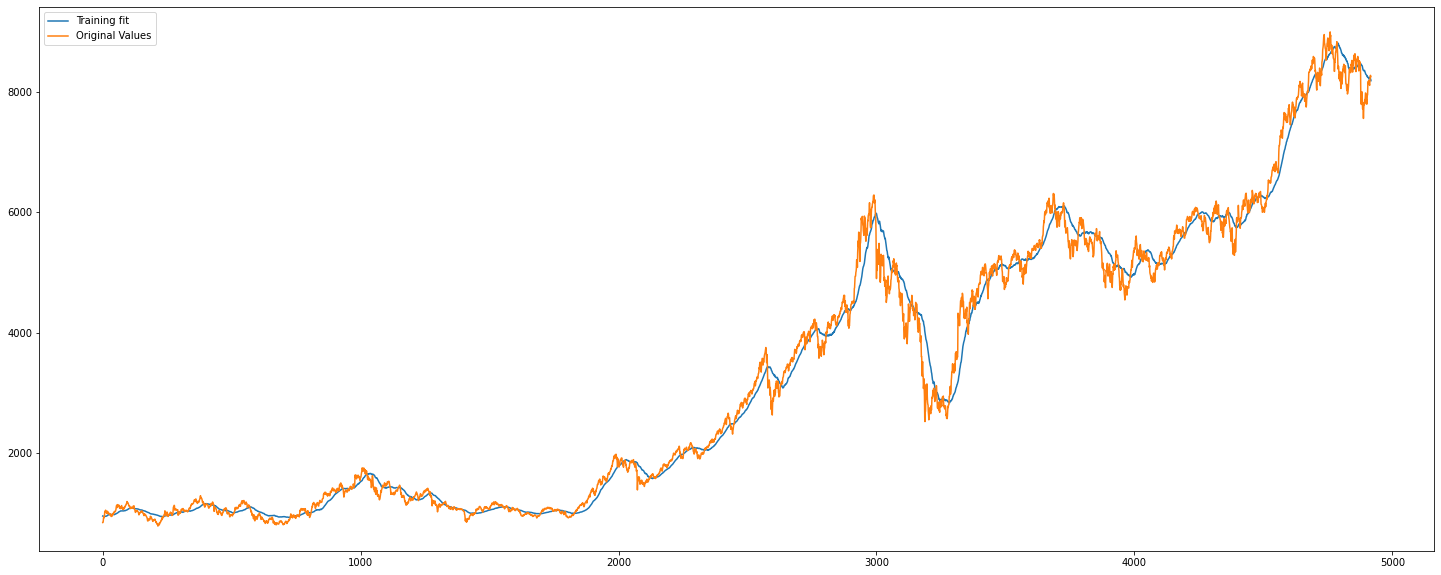

In [34]:
plt.figure(figsize=(25,10))
plt.plot(scaler.inverse_transform(training_predictions) , label='Training fit')
plt.plot(scaler.inverse_transform(np.array(y_train).reshape(-1,1)), label = 'Original Values')
plt.legend()
plt.show()

In [37]:
print('Mean Squared Error = {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) , scaler.inverse_transform(preds))))
print('Mean absolute Error = {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) , scaler.inverse_transform(preds))))

Mean Squared Error = 375062.1615217642
Mean absolute Error = 398.61914484370345


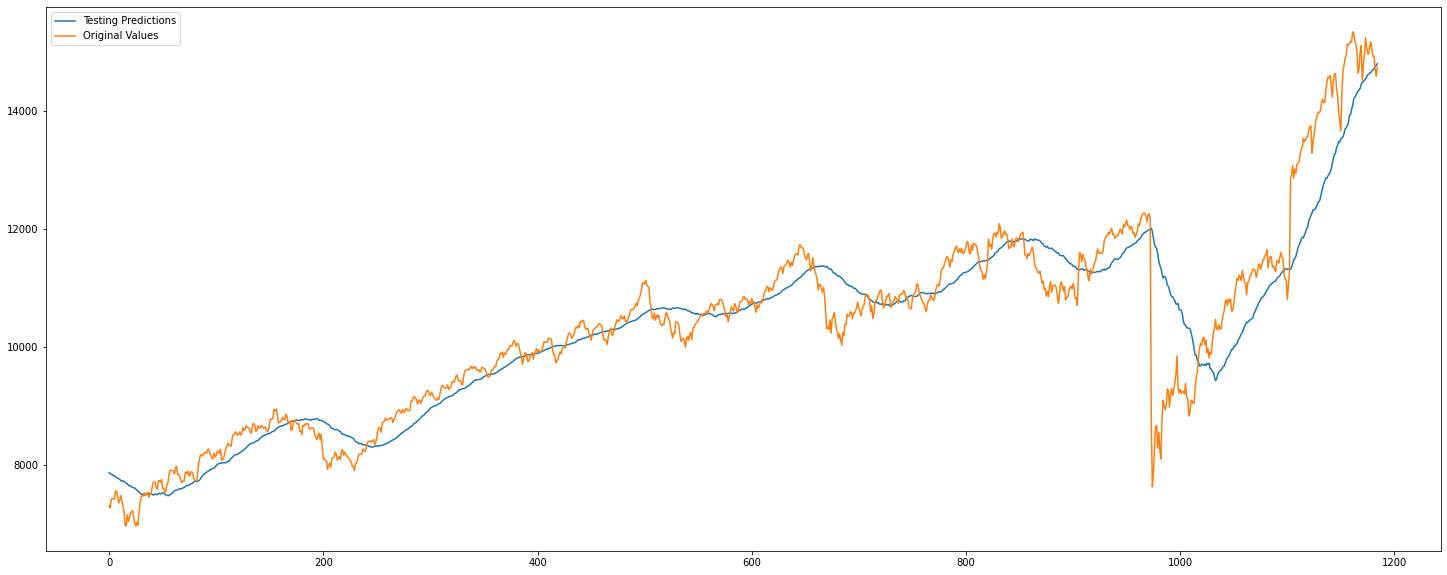

In [30]:
plt.figure(figsize=(25,10))
plt.plot(scaler.inverse_transform(preds) , label='Testing Predictions')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)), label = 'Original Values')
plt.legend()
plt.show()

In [74]:
regressor.save('./models/NSE501.pkl')